In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def bilinear_interp(x, y, f00, f10, f01, f11): # Only accepts normalized x, y
    return (f00 * (1 - x) * (1 - y) +
            f10 * x * (1 - y) +
            f01 * (1 - x) * y +
            f11 * x * y)

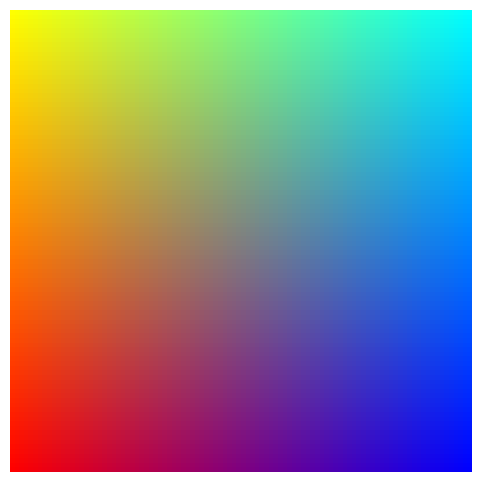

In [26]:
# Bilinear interpolation
rgb_corners = np.array([[1,1,0], [1,0,0], [0,1,1], [0,0,1]])
rgb00, rgb01, rgb10, rgb11 = rgb_corners

n = 100
img = np.zeros((n,n,3))

for ix in range(n):
    for iy in range(n):
        x = ix / (n - 1) # Scale x and y from 0-(n-1) to 0-1
        y = iy / (n - 1)
        img[iy, ix] = bilinear_interp(x, y, rgb00, rgb10, rgb01, rgb11)

s = 6
plt.figure(figsize=(s,s))
plt.imshow(img)
plt.axis('off')
plt.show()

In [32]:
# RGB to HSV
def RGB2HSV(r, g, b):
    R, G, B = r/255, g/255, b/255
    
    RGB = [R, G, B]
    V = np.max(RGB)
    C = V - np.min(RGB)
    S = C / V
    
    # Compute H
    if C == 0:
        H = np.nan
    elif V == R:
        H = (G-B)/C % 6
    elif V == G:
        H = (B-R)/C + 2
    elif V == B:
        H = (R-G)/C + 4

    # Rescale
    H *= 60
    S *= 255
    V *= 255
    
    return (H, S, V)

color = (255, 0, 255)
print(RGB2HSV(*color))

(300.0, 255.0, 255.0)
